In [1]:
# Atomic resolution image simulation notebook
# With a real probe
# Using AS and CEOS servers
# and pystemsim

In [ ]:
# Run servers:
# central_server.py
# AS_server_SimAtomRes.py
# Ceos_sever_twin.py
# like this from the main folder: python -m asyncroscopy.servers.protocols.central_server

In [2]:
import sys
import ast
sys.path.insert(0, '../')
from asyncroscopy.clients.notebook_client import NotebookClient
import matplotlib.pyplot as plt

import pyTEMlib
from pyTEMlib import probe_tools as pt

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Qt dialogs are not available


### Connections:

In [3]:
# Connect the Client to the central (async) server
tem = NotebookClient.connect(host='localhost',port=9000)

# Tell the central server address of all connected instruments
routing_table= {"AS": ("localhost", 9001),
                "Gatan": ("localhost", 9002),
                "Ceos": ("localhost", 9003),
                "Preacquired_AS": ("localhost", 9004)}
tem.send_command('Central',"set_routing_table", routing_table)

Connecting to central server localhost:9000...
Connected to central server.


'[Central] Routing table updated'

In [ ]:
# connect to the AutoScript computer and initialize microscope
tem.send_command('AS',command='connect_AS',args={'host':'localhost','port':9001})

In [6]:
tem.send_command(destination = 'Ceos', command = 'getInfo', args = {})

'CEOS Digital Twin Server'

### Help commands:

In [4]:
# Now that we're routed to all instruments,
# let's take an inventory of commands available on each instrument
cmds = tem.send_command('AS', 'discover_commands')
print(cmds)

["connect_AS", "connectionLost", "connectionMade", "dataReceived", "disconnect", "discover_commands", "get_help", "get_scanned_image", "get_stage", "get_status", "lengthLimitExceeded", "logPrefix", "makeConnection", "pauseProducing", "resumeProducing", "sendString", "stopProducing", "stringReceived"]


In [5]:
# These two are working, but should be much better.
tem.send_command('AS', command='get_help', args={'command_name':'connect_AS'})

'{"name": "connect_AS", "signature": "(args: dict)", "summary": "Connect to the microscope via AutoScript", "doc": "Connect to the microscope via AutoScript"}'

### Setting the aberrations from known values:

In [6]:
aberrations = pt.get_target_aberrations("Spectra300", 60000)
tem.send_command(destination = 'Ceos', command = 'uploadAberrations', args = aberrations)
pt.print_aberrations(aberrations)

In [7]:
# at any time, we can view the current aberrations
# this should be implemented in the real ceos server as well
ab = tem.send_command(destination = 'Ceos', command = 'getAberrations', args={})
ab = ast.literal_eval(ab)
pt.print_aberrations(ab)

### Get an image:

simulated with pystemsim inside the AS_server_SimAtomRes (working with the Ceos server)

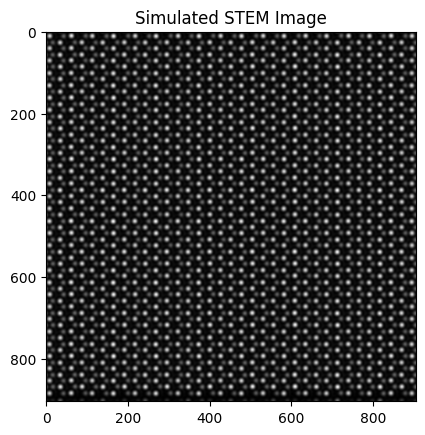

In [8]:
image_args = {'scanning_detector':'HAADF',
                'size':512,
                'dwell_time':10e-6}

img = tem.send_command('AS','get_scanned_image', image_args)

plt.imshow(img, cmap="gray")
plt.title("Simulated STEM Image")
plt.show()


### How it's actually working:
![Structure Diagram](../DT_workflow.png)

### try changing an aberration

In [9]:
tem.send_command(destination = 'Ceos', command = 'correctAberration', args = {"name": 'C10', "value": -6})

'Aberration C10 corrected by -6.0'

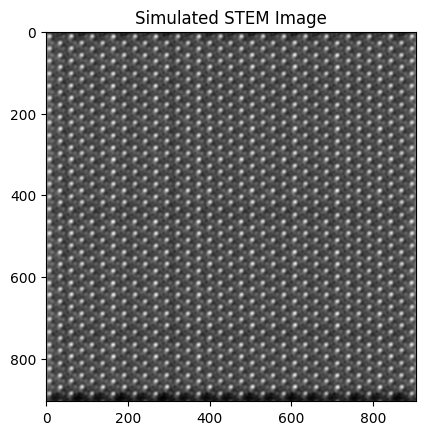

In [10]:
image_args = {'scanning_detector':'HAADF',
                'size':512,
                'dwell_time':10e-6}

img = tem.send_command('AS','get_scanned_image', image_args)

plt.imshow(img, cmap="gray")
plt.title("Simulated STEM Image")
plt.show()